1. Split the dataset into 70% training set and 30% test set.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

data = load_boston()
x = data.data
y = data.target
# split the dataset to training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

In [2]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf_y_predict = clf.predict(x_test)

3. Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.

In [3]:
Td = clf.get_depth()
print("Tree depth:", Td)
print("Number of leaves:", clf.get_n_leaves())
print("Feature importance:", clf.feature_importances_)
print("Train score:", clf.score(x_train, y_train))
print("Test score:", clf.score(x_test, y_test))

Tree depth: 14
Number of leaves: 205
Feature importance: [0.08913185 0.00965783 0.0470657  0.01638214 0.06790031 0.17672371
 0.10357155 0.06647292 0.01648677 0.07154238 0.05468961 0.11416582
 0.1662094 ]
Train score: 1.0
Test score: 0.13815789473684212


4. Show the visual output of the decision tree.

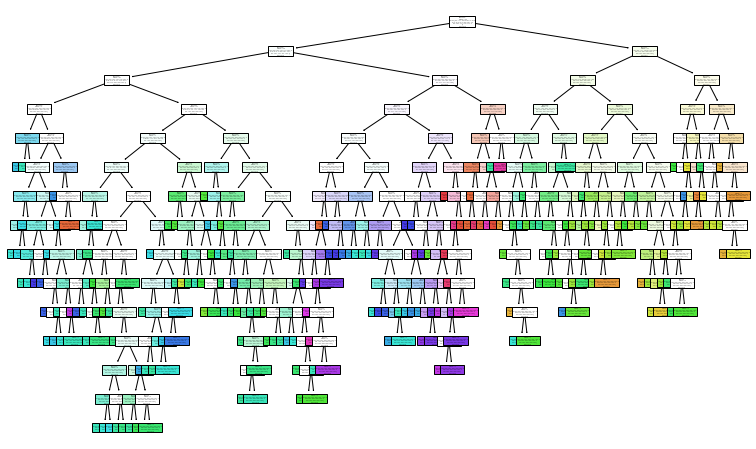

In [4]:
plt.figure(figsize=(13,8))
plot_tree(clf, feature_names=y, class_names=True, filled=True)
plt.show()

5. Next, Generate (Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d − 1)}. The tree depth can be set using max=d, where d is the depth of the tree.
6. For each of the (Td-1) trees report, tree depth, number of leaves, feature importance, train score, and test score of the tree.

In [5]:
max_test_score = 0
max_clf = clf.fit(x_train, y_train)
# Generate (Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d − 1)}
for depth in range(1, Td):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(x_train, y_train)
    clf_y_predict = clf.predict(x_test)
    print("Tree depth:", depth)
    print("Number of leaves:", clf.get_n_leaves())
    print("Feature importance:", clf.feature_importances_)
    print("Train score:", clf.score(x_train, y_train))
    print("Test score:", clf.score(x_test, y_test))
    # keep track of the decision tree with highest test score
    if max_test_score < clf.score(x_test, y_test):
        max_test_score = clf.score(x_test, y_test)
        max_clf = clf

Tree depth: 1
Number of leaves: 2
Feature importance: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Train score: 0.12994350282485875
Test score: 0.07894736842105263
Tree depth: 2
Number of leaves: 4
Feature importance: [0.22398632 0.         0.         0.         0.         0.35382372
 0.         0.         0.         0.         0.         0.
 0.42218997]
Train score: 0.1553672316384181
Test score: 0.07894736842105263
Tree depth: 3
Number of leaves: 8
Feature importance: [0.24920638 0.         0.         0.         0.         0.30153342
 0.         0.06287397 0.         0.         0.         0.
 0.38638623]
Train score: 0.22033898305084745
Test score: 0.10526315789473684
Tree depth: 4
Number of leaves: 16
Feature importance: [0.16199264 0.         0.         0.         0.03859965 0.29872273
 0.         0.07038761 0.         0.1416257  0.         0.03750745
 0.25116422]
Train score: 0.2796610169491525
Test score: 0.08552631578947369
Tree depth: 5
Number of leaves: 32
Feature importance: [0.1

7. Show the visual output of the decision tree with highest test score from the (Td-1) trees.

The output of highest test score with depth 13


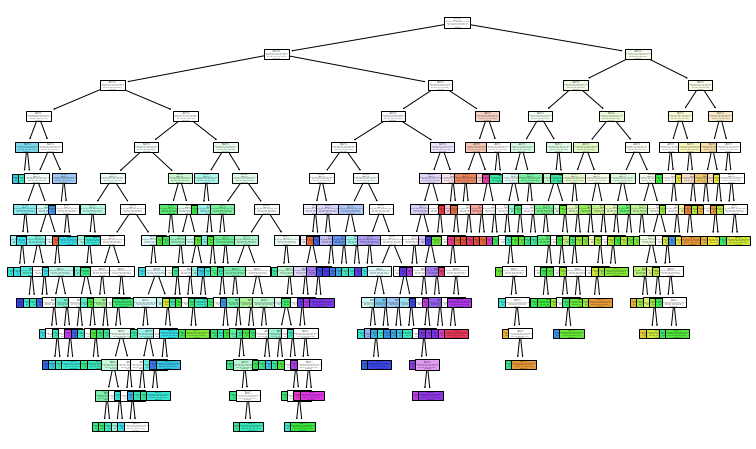

In [6]:
print("The output of highest test score with depth",max_clf.get_depth())
plt.figure(figsize=(13,8))
plot_tree(max_clf, feature_names=y, class_names=True, filled=True)
plt.show()